In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [ ]:
home_data = pd.read_csv("./dataset/train.csv")

print (home_data.describe())
print (home_data.columns)

features = ['Rooms', 'Bathroom', 'Distance', 'Landsize', 'Type', 'Regionname']
X = pd.get_dummies(home_data[features])
y = home_data['Price']

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='str')


In [6]:
model = RandomForestRegressor(random_state=1)
model.fit(train_X, train_y)
predictions = model.predict(test_X)

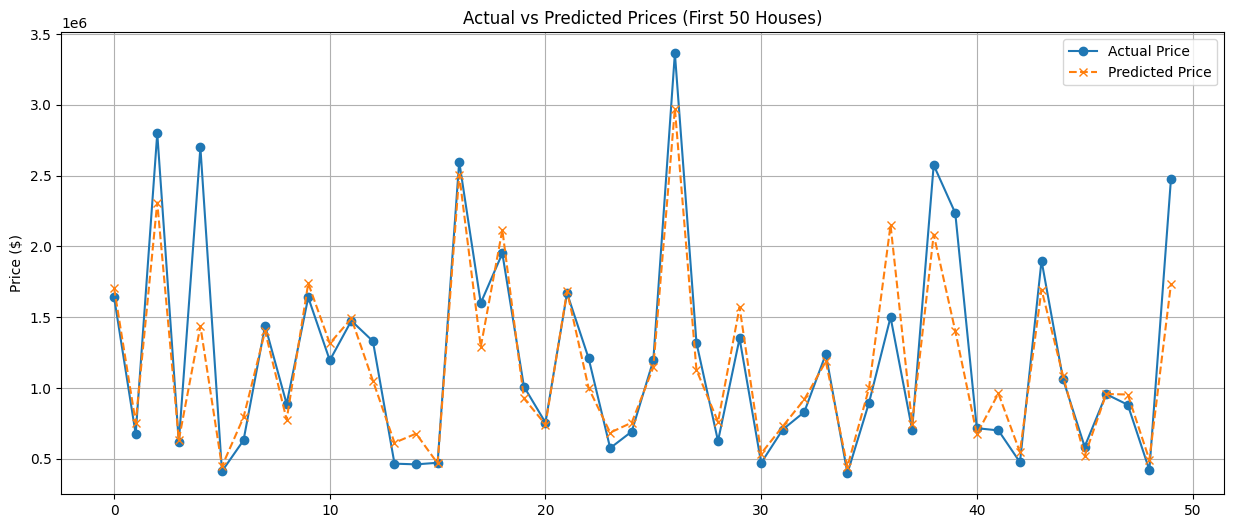

In [ ]:
# Comparison between actual and predicted prices for first 50 houses

comparison = pd.DataFrame({'Actual': test_y, 'Predicted': predictions})

plt.figure(figsize=(15, 6))
plt.plot(comparison['Actual'].values[:50], label='Actual Price', marker='o')
plt.plot(comparison['Predicted'].values[:50], label='Predicted Price', marker='x', linestyle='--')
plt.title("Actual vs Predicted Prices (First 50 Houses)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted')

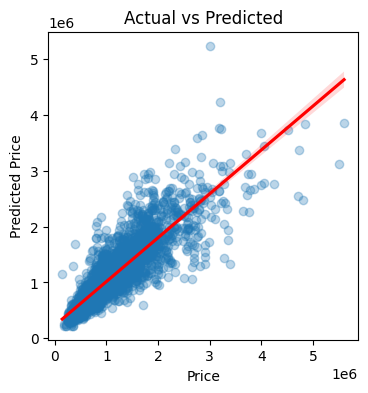

In [ ]:
# Regression plot

plt.figure(figsize=(4, 4))

sns.regplot(x=test_y, y=predictions, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")

In [23]:
mae = mean_absolute_error(test_y, predictions)
mape = mean_absolute_percentage_error(test_y, predictions)

accuracy = 100 - (mape * 100)

print(f"Mean Absolute Error (MAE): {mae:.0f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Absolute Error (MAE): 194574
Mean Absolute Percentage Error (MAPE): 17.97%
Model Accuracy: 82.03%
